In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
#Load the data
df=pd.read_csv("supermarket_sales.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/19,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
#understand the data
df.info()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1003 non-null   object 
 1   Branch                   1003 non-null   object 
 2   City                     1003 non-null   object 
 3   Customer type            924 non-null    object 
 4   Gender                   1003 non-null   object 
 5   Product line             960 non-null    object 
 6   Unit price               996 non-null    float64
 7   Quantity                 983 non-null    float64
 8   Tax 5%                   1003 non-null   float64
 9   Total                    1003 non-null   float64
 10  Date                     1003 non-null   object 
 11  Time                     1003 non-null   object 
 12  Payment                  1003 non-null   object 
 13  cogs                     1003 non-null   float64
 14  gross margin percentage 

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [4]:
#Missing Values
df.isnull().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type              79
Gender                      0
Product line               43
Unit price                  7
Quantity                   20
Tax 5%                      0
Total                       0
Date                        0
Time                        0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
dtype: int64

In [28]:
df.isnull().mean() * 100

Invoice ID                 0.0
Branch                     0.0
City                       0.0
Customer type              0.0
Gender                     0.0
Product line               0.0
Unit price                 0.0
Quantity                   0.0
Tax 5%                     0.0
Total                      0.0
Date                       0.0
Time                       0.0
Payment                    0.0
cogs                       0.0
gross margin percentage    0.0
gross income               0.0
Rating                     0.0
Month                      0.0
DayOfWeek                  0.0
dtype: float64

In [5]:
#Since the percentage of null values in Customer type and product line and
# Quantity is more 1% so we fill them with "unknown"
#Since Unit Price percentage is less than 1% so it can be dropped (safely)
df.dropna(subset=['Unit price'], inplace=True)
df['Product line'].fillna('Unknown', inplace=True)
df['Customer type'].fillna('Unknown', inplace=True)
df['Quantity'].fillna('Unknown', inplace=True)

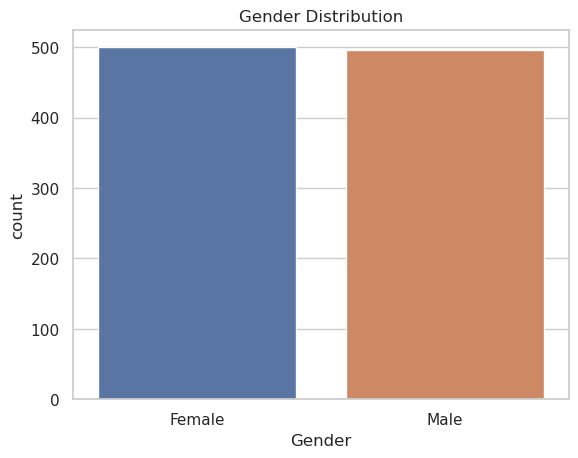

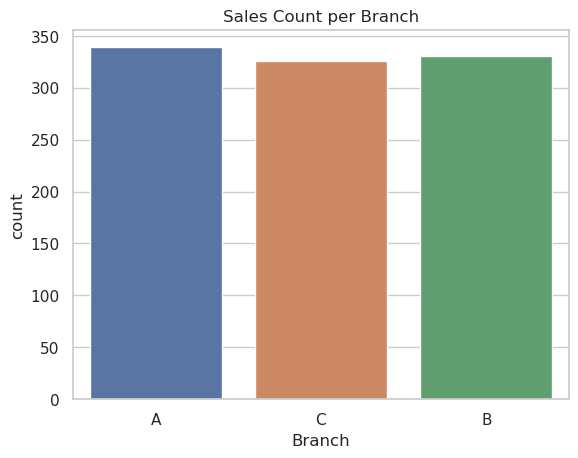

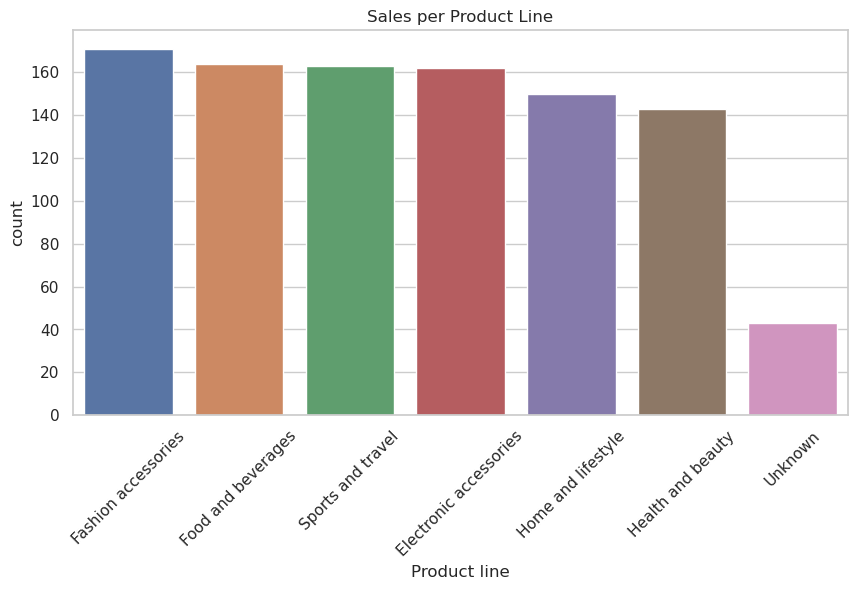

In [6]:
#Basic Univariate Analysis
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()
####
sns.countplot(x='Branch', data=df)
plt.title('Sales Count per Branch')
plt.show()
####
plt.figure(figsize=(10,5))
sns.countplot(x='Product line', data=df, order=df['Product line'].value_counts().index)
plt.title('Sales per Product Line')
plt.xticks(rotation=45)
plt.show()


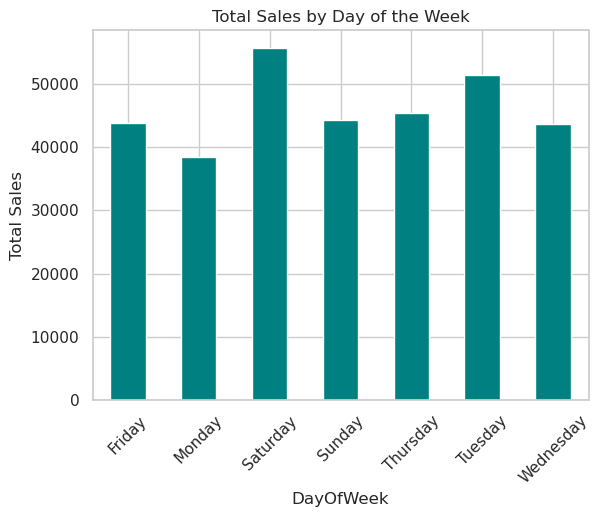

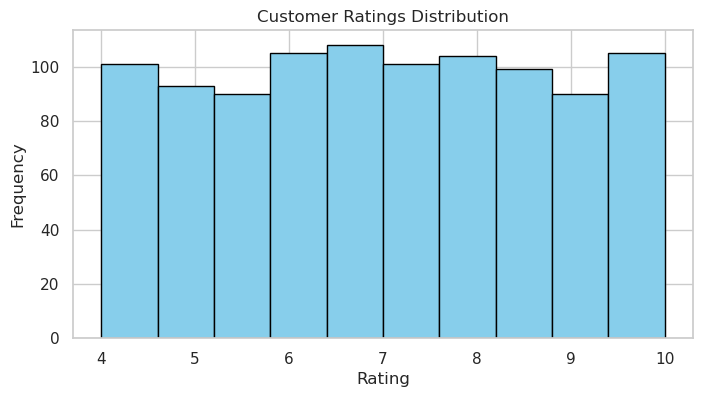

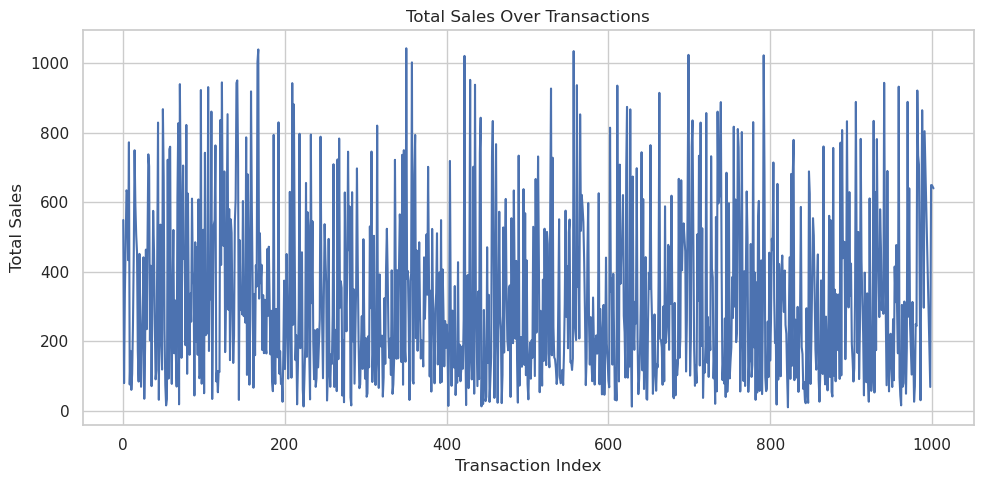

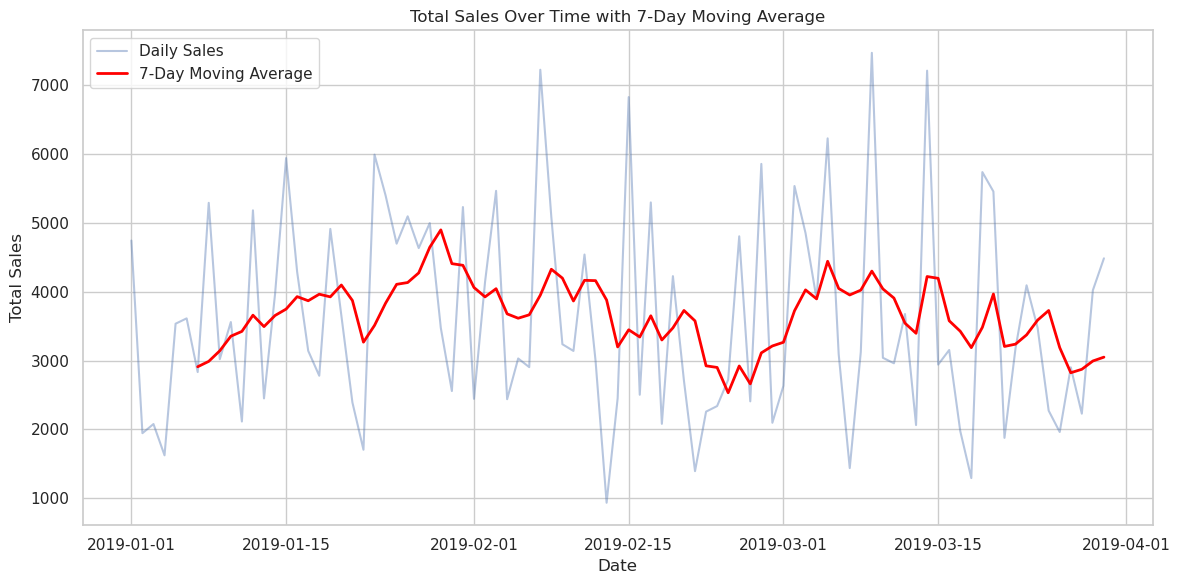

In [7]:
#Feature Engineering – Convert Date
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.day_name()
####
df.groupby('DayOfWeek')['Total'].sum().plot(kind='bar', color='teal')
plt.title("Total Sales by Day of the Week")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()
####
plt.figure(figsize=(8, 4))
plt.hist(df['Rating'], bins=10, color='skyblue', edgecolor='black')
plt.title('Customer Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()
#####
plt.figure(figsize=(10, 5))
plt.plot(df['Total'])
plt.title('Total Sales Over Transactions')
plt.xlabel('Transaction Index')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

###
daily_sales = df.groupby('Date')['Total'].sum().reset_index()

#####
daily_sales['Moving_Avg'] = daily_sales['Total'].rolling(window=7).mean()
####
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['Total'], label='Daily Sales', alpha=0.4)
plt.plot(daily_sales['Date'], daily_sales['Moving_Avg'], label='7-Day Moving Average', color='red', linewidth=2)
plt.title('Total Sales Over Time with 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#Summarize insights:

#Gender Distribution
#The dataset contains an equal number of male and female customers, indicating a balanced gender representation in the customer base.

#Sales by Branch
#Sales are relatively consistent across all three branches. However, Branch A shows slightly higher total sales compared to Branches B and C.

#Top-Selling Product Line
#Fashion accessories are the most frequently sold product category, outperforming all other product lines in terms of volume.

#Sales by Day of the Week
#Saturday records the highest sales, while the rest of the week sees relatively stable sales volumes, averaging around 40,000 in total daily revenue

In [8]:
#Sales Are Volatile Day-to-Day
#The light blue line shows large ups and downs in daily sales.
#These fluctuations suggest customers don’t spend evenly every day 
# and that's common in retail due to weekends, holidays, or promotional events.
#The red moving average line reveals smoother cycles and general sales patterns:
#January to Early February: Gradual increase in sales.
#Mid-February: A dip (possible slowdown).
#Late February to Early March: Recovery, with several peaks.
#March to April: A decline or stabilization trend.

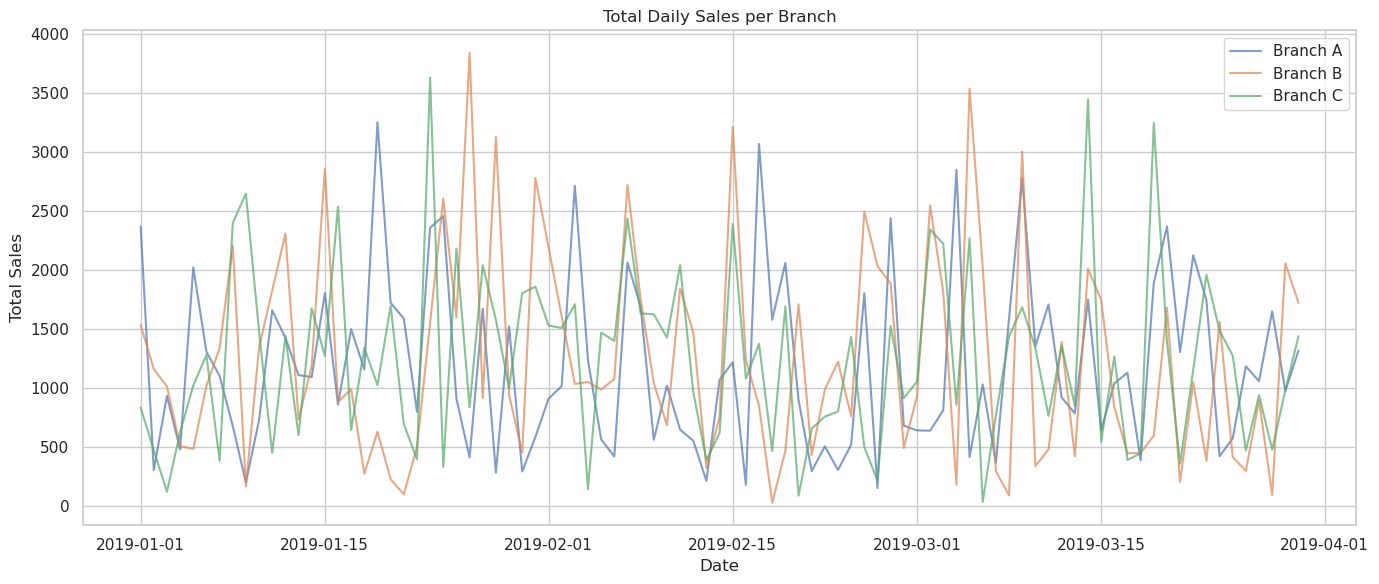

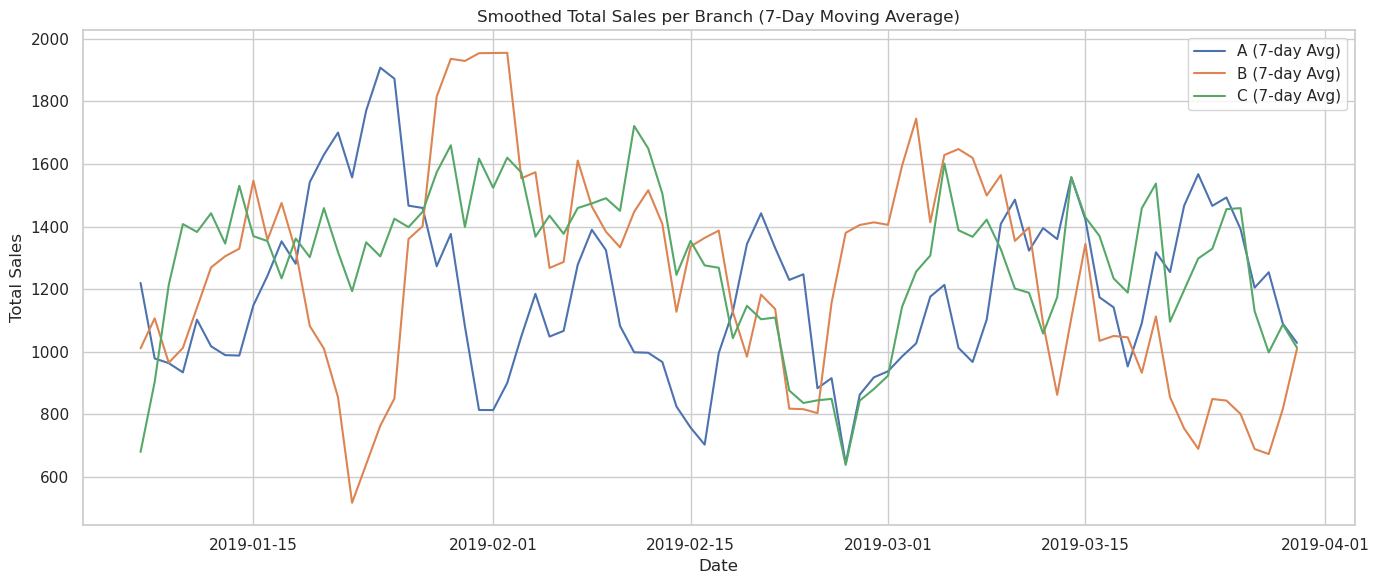

In [10]:
daily_branch_sales = df.groupby(['Date', 'Branch'])['Total'].sum().reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Loop over each branch and plot its line
for branch in daily_branch_sales['Branch'].unique():
    branch_data = daily_branch_sales[daily_branch_sales['Branch'] == branch]
    plt.plot(branch_data['Date'], branch_data['Total'], label=f'Branch {branch}', alpha=0.7)

plt.title('Total Daily Sales per Branch')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.figure(figsize=(14, 6))

for branch in daily_branch_sales['Branch'].unique():
    branch_data = daily_branch_sales[daily_branch_sales['Branch'] == branch]
    branch_data = branch_data.sort_values('Date')
    branch_data['Moving_Avg'] = branch_data['Total'].rolling(window=7).mean()
    
    plt.plot(branch_data['Date'], branch_data['Moving_Avg'], label=f'{branch} (7-day Avg)')

plt.title('Smoothed Total Sales per Branch (7-Day Moving Average)')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#Branch A (Blue)
#Shows high variability.
#Peaks around mid-January and mid-March.
#Dips to lower sales in early February and early March.
#Overall, performance is average but unstable.

#Branch B (Orange)
#Spikes sharply at the end of January — possibly due to a promotion or local event.
#Declines steadily afterward with multiple low phases in February and March.
#Starts strong but ends weak — a downward trend overall.

#Branch C (Green)
#Most stable line overall.
#Less spiky, with smoother sales throughout.
#Maintains steady sales without dramatic ups or downs.
#Indicates consistent customer behavior and performance.

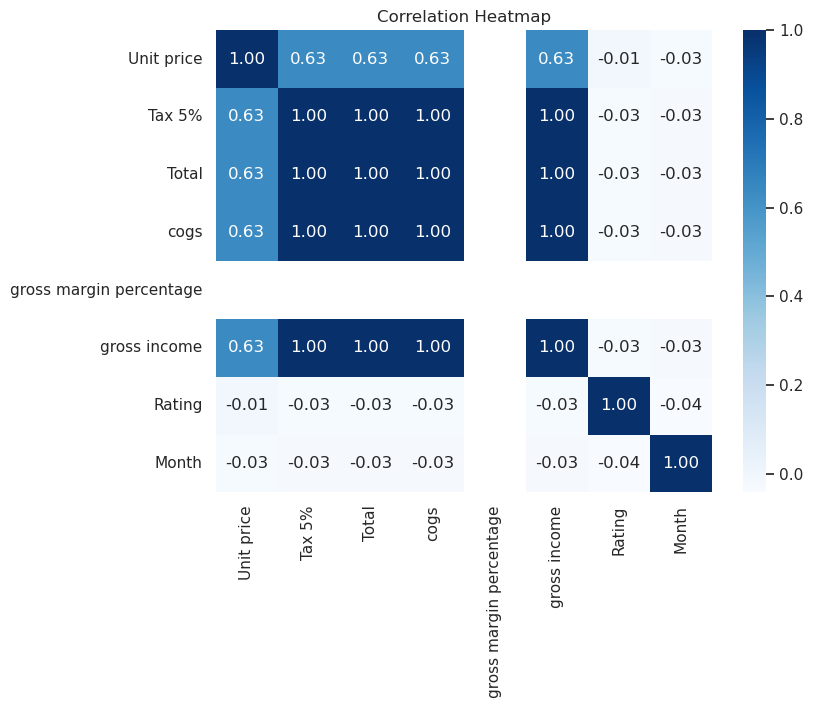

In [12]:
####
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
#Revenue metrics (Total, Tax, COGS, Gross Income) are highly interlinked — not surprising.
#Quantity sold and unit price both strongly influence the bottom line.
#Rating and Month might be driven by external factors (season, holidays, service quality) rather than financials — worth deeper analysis if you want to study customer satisfaction separately.